In [ ]:
import keras

#Input Layer
Used to instantiate a Keras Tensor.
A Keras tensor is a symbolic tensor-like object, which we augment with certain attributes that allow us to build a Keras model just by knowing the inputs and outputs of the model.

For instance, if a, b and c are Keras tensors, it becomes possible to do: model = Model(input=[a, b], output=c)


```
keras.Input(
    shape=None,
    batch_size=None,
    dtype=None,
    sparse=None,
    batch_shape=None,
    name=None,
    tensor=None,
)
```

#Dense Layer
regular densely-connected NN layer.

Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).



```
keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```



In [ ]:
# This is a logistic regression in Keras
x = keras.layers.Input(shape=(32,))
y = keras.layers.Dense(16, activation='softmax')(x)
model = keras.models.Model(x, y)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
Total params: 528 (2.06 KB)
Trainable params: 528 (2.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Activation Functions
Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers



```
layers.Dense(64, activation=activations.relu)
layers.Activation(activations.relu)

```


Available Functions
1.   relu function
2. sigmoid function
3. softmax function
4. softplus function
5. softsign function
6. tanh function
7. selu function
8. elu function
9. exponential function
10. leaky_relu function
11. relu6 function
12. silu function
13. gelu function
14. hard_sigmoid function
15. linear function
16. mish function
17. log_softmax function


You also could create your own custom activation


In [ ]:
from keras import backend as K
from keras.utils import get_custom_objects
def customAct(x):
  return K.exp(x)

get_custom_objects().update({'customAct': keras.layers.Activation(customAct)})

x = keras.layers.Input(shape=(32,))
y = keras.layers.Dense(16, activation= "customAct")(x)
model = keras.models.Model(x, y)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
Total params: 528 (2.06 KB)
Trainable params: 528 (2.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from numpy import random

x = random.randint(100, size=(1, 32))
print(x)
print(model(x))

[[92 24 14 41 64 64 49 34 31 52 72 19  9  7 18 48  6 45 39 74 28 27 85  4
  54 69 31 27 21 22 67 38]]
tf.Tensor(
[[1.2581224e+12 7.3493144e+17 1.3206413e+10 8.3369102e+00 5.3163305e-24
  8.5529920e+13 1.4784572e-37 2.1654330e+21 6.7017863e-06 1.9569730e+24
  6.5965992e-31 4.3566850e-20 1.1620195e-27 6.5539945e+06 9.2925284e-21
  4.1023908e+12]], shape=(1, 16), dtype=float32)


#Convolutional Layer
This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.



```
#Example : Conv2D
keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```

List of Convolution Layers :  
1. Conv1D
2. Conv2D
3. Conv3D
4. SeparableConv1D
5. SeparableConv2D
6. SeparableConv3D
7. Conv1DTranspose
8. Conv2DTranspose
9. Conv3DTranspose

#Pooling Layers
Downsamples the input along its spatial dimensions (height and width) by taking some value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.

The resulting output when using the "valid" padding option has a spatial shape (number of rows or columns) of: output_shape = math.floor((input_shape - pool_size) / strides) + 1 (when input_shape >= pool_size)

The resulting output shape when using the "same" padding option is: output_shape = math.floor((input_shape - 1) / strides) + 1



```
# Example : MaxPooling2D
keras.layers.MaxPooling2D(
    pool_size=(2, 2), strides=None, padding="valid", data_format=None, name=None, **kwargs
)
```

List of Pooling Layers :
1. MaxPooling1D layer
1. MaxPooling2D layer
1. MaxPooling3D layer
1. AveragePooling1D layer
1. AveragePooling2D layer
1. AveragePooling3D layer
1. GlobalMaxPooling1D layer
1. GlobalMaxPooling2D layer
1. GlobalMaxPooling3D layer
1. GlobalAveragePooling1D layer
1. GlobalAveragePooling2D layer
1. GlobalAveragePooling3D layer


#Basic Example CNN
This is an example for simple classification using MNIST Dataset. This experiment conducted using LeNet Model.

In [ ]:
import cv2 # OpenCV
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
# Load the data using TFDS
(train_data, test_data), ds_info = tfds.load(name="emnist/digits",
                                             split=["train", "test"],
                                             shuffle_files=True,
                                             as_supervised=True, # Data gets returned in tuple format (data, label)
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/240000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/digits/3.0.0.incompleteL98DOE/emnist-train.tfrecord*...:   0%|     …

Generating test examples...:   0%|          | 0/40000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/digits/3.0.0.incompleteL98DOE/emnist-test.tfrecord*...:   0%|      …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/digits/3.0.0. Subsequent calls will reuse this data.


In [ ]:
# Shuffle the data
train_data = train_data.shuffle(500)
test_data = test_data.shuffle(500)

In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='emnist',
    full_name='emnist/digits/3.0.0',
    description="""
    The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset.
    
    Note: Like the original EMNIST data, images provided here are inverted horizontally and rotated 90 anti-clockwise. You can use `tf.transpose` within `ds.map` to convert the images to a human-friendlier format.
    """,
    config_description="""
    EMNIST Digits
    """,
    homepage='https://www.nist.gov/itl/products-and-services/emnist-dataset',
    data_dir=PosixGPath('/tmp/tmpycqb6_zltfds'),
    file_format=tfrecord,
    download_size=535.73 MiB,
    dataset_size=120.32 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'lab

In [ ]:
class_names = ds_info.features["label"].names
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
tfds.as_dataframe(train_data.take(10), ds_info)

,image,label
0,,8
1,,8
2,,3
3,,8
4,,6
5,,8
6,,2
7,,5
8,,3
9,,4


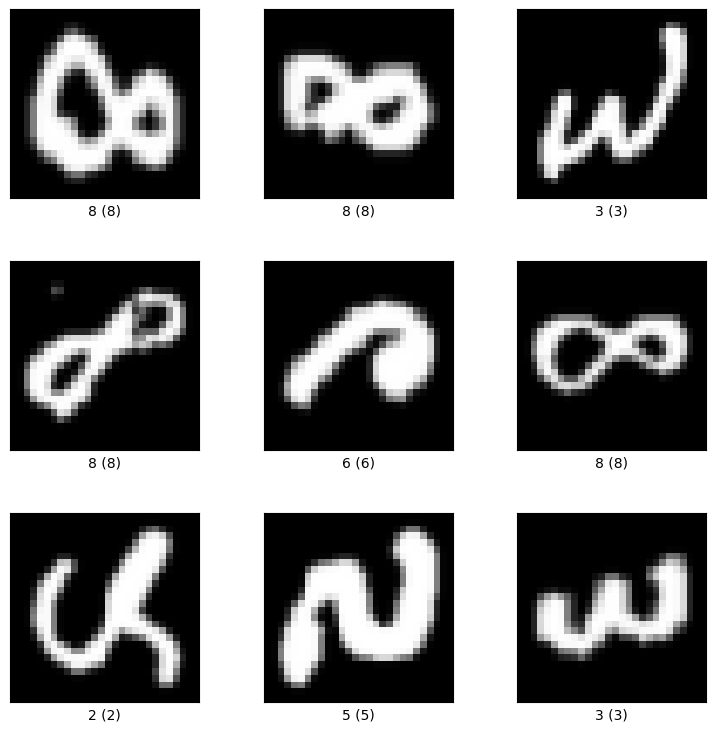

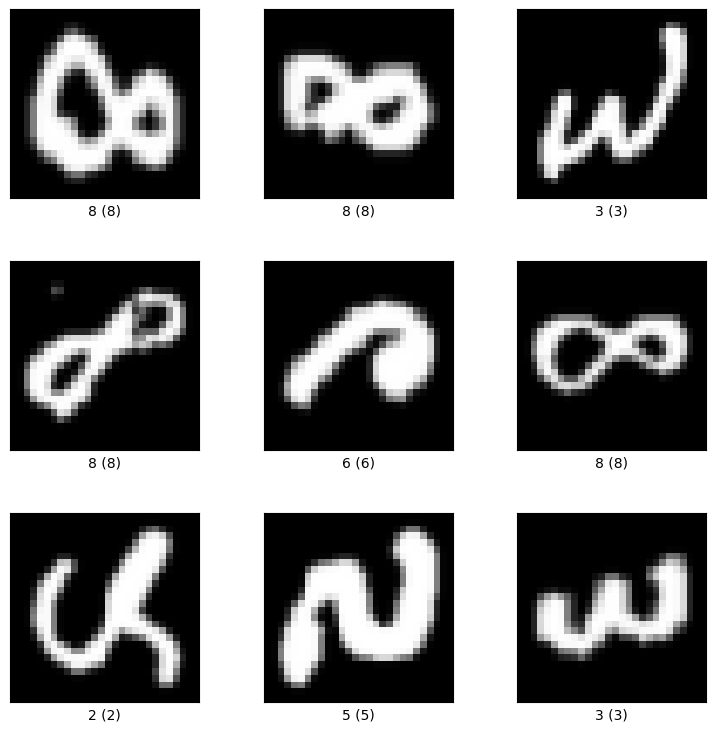

In [ ]:
tfds.show_examples(train_data, ds_info)

In [ ]:
test_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
def preprocess_image(image, label):
  # One Hot Encoding
  # 0 1 2 3 4 5 6 7 8 9
  # example 4
  # 0 0 0 0 1 0 0 0 0 0
  return tf.cast(image, tf.float32) / 255., tf.one_hot(label, depth=10)


In [ ]:
# Map and batch the dataset
mapped_train_data = train_data.map(preprocess_image).batch(32)
mapped_test_data = test_data.map(preprocess_image).batch(32)

In [ ]:
mapped_train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
model = keras.models.Sequential(
    [ keras.layers.Input(shape=(28, 28, 1)),
      keras.layers.Conv2D(filters=12, kernel_size=(5, 5), activation="relu"),
      keras.layers.Conv2D(filters=24, kernel_size=(3, 3), activation="relu"),
      keras.layers.Conv2D(filters=24, kernel_size=(3, 3), activation="relu"),
      keras.layers.Conv2D(filters=32, kernel_size=(1, 1), activation="relu"),
      keras.layers.MaxPool2D(pool_size=2, padding="valid"),
      keras.layers.Flatten(),
      keras.layers.Dense(10, activation="softmax")]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 12)        312       
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 24)        2616      
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 24)        5208      
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        800       
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                        

In [ ]:
inputs = keras.layers.Input(shape=(28, 28, 1))
x = keras.layers.Conv2D(filters=12, kernel_size=(5, 5), activation="relu")(inputs)
x = keras.layers.Conv2D(filters=24, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.Conv2D(filters=24, kernel_size=(3, 3), activation="relu")(x)
x = keras.layers.Conv2D(filters=32, kernel_size=(1, 1), activation="relu")(x)
x = keras.layers.MaxPool2D(pool_size=2, padding="valid")(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)

model = keras.models.Model(inputs=inputs, outputs=outputs, name="Functional_Model_MNIST")
model.summary()

Model: "Functional_Model_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 24, 24, 12)        312       
                                                                 
 conv2d_21 (Conv2D)          (None, 22, 22, 24)        2616      
                                                                 
 conv2d_22 (Conv2D)          (None, 20, 20, 24)        5208      
                                                                 
 conv2d_23 (Conv2D)          (None, 20, 20, 32)        800       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                            

In [ ]:

model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [ ]:
history = model.fit(mapped_train_data.take(32), epochs=10)

Epoch 1/10
32/32 [==============================] - 2s 44ms/step - loss: 1.3772 - accuracy: 0.5684
Epoch 2/10
32/32 [==============================] - 1s 45ms/step - loss: 0.3972 - accuracy: 0.8867
Epoch 3/10
32/32 [==============================] - 2s 59ms/step - loss: 0.2245 - accuracy: 0.9395
Epoch 4/10
32/32 [==============================] - 2s 77ms/step - loss: 0.1496 - accuracy: 0.9629
Epoch 5/10
32/32 [==============================] - 2s 65ms/step - loss: 0.0997 - accuracy: 0.9834
Epoch 6/10
32/32 [==============================] - 2s 74ms/step - loss: 0.0810 - accuracy: 0.9814
Epoch 7/10
32/32 [==============================] - 2s 64ms/step - loss: 0.0956 - accuracy: 0.9697
Epoch 8/10
32/32 [==============================] - 3s 99ms/step - loss: 0.0859 - accuracy: 0.9727
Epoch 9/10
32/32 [==============================] - 2s 56ms/step - loss: 0.0541 - accuracy: 0.9834
Epoch 10/10
32/32 [==============================] - 1s 44ms/step - loss: 0.0150 - accuracy: 0.9971


In [ ]:
model.evaluate(mapped_test_data)

1250/1250 [==============================] - 18s 15ms/step - loss: 0.6693 - accuracy: 0.8732


[0.6692517399787903, 0.8732249736785889]

In [ ]:
for images, labels in mapped_test_data.take(1):
    pred = tf.argmax(model.predict(images), axis=1)
    gt_label = tf.argmax(labels, axis=1)
    print("Prediction:", pred, "Ground Truth:", gt_label)

1/1 [==============================] - 0s 85ms/step
Prediction: tf.Tensor([1 3 6 7 6 3 9 2 2 6 7 7 0 8 4 3 3 0 1 7 2 3 2 3 3 8 3 0 7 1 1 8], shape=(32,), dtype=int64) Ground Truth: tf.Tensor([1 1 6 7 6 3 9 2 2 6 7 7 4 8 4 3 3 0 1 7 3 3 5 3 0 8 3 0 7 1 1 8], shape=(32,), dtype=int64)


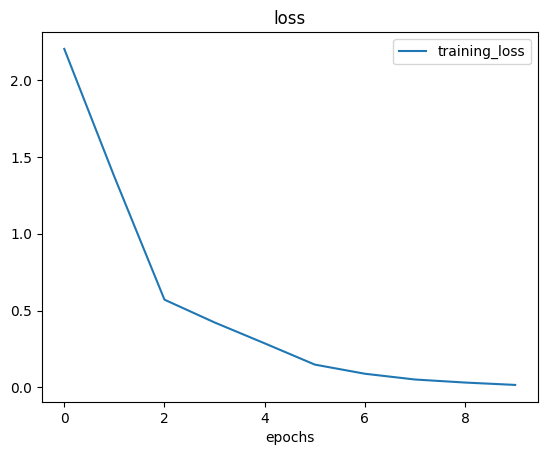

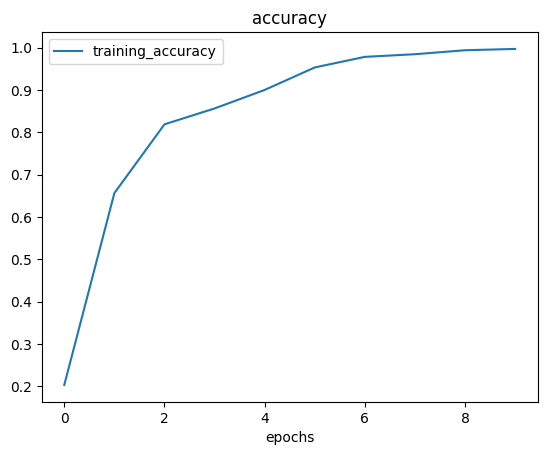

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']


    accuracy = history.history['accuracy']


    epochs = range(len(history.history['loss'])) # How many epochs


    # Plot loss
    plt.plot(epochs, loss, label="training_loss")

    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")

    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

plot_loss_curves(history)

# Data Augmentation

In [ ]:
# Augmentation Layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

Image shape (28, 28, 1)


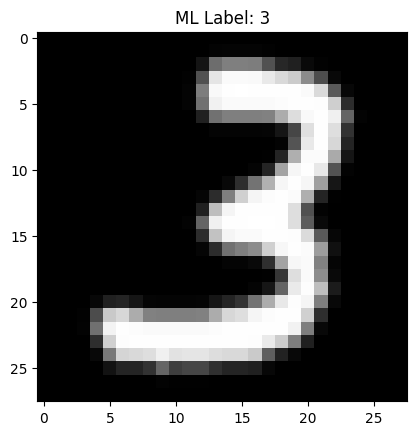

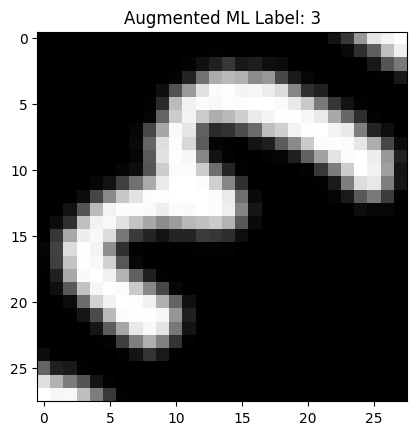

In [ ]:
def show_image_random_and_augmentation(ds):
  for image, label in ds.take(1):
    showed_image = np.rot90(np.fliplr(image))
    print("Image shape", showed_image.shape)
    plt.imshow(np.squeeze(showed_image), cmap="gray")
    plt.title("ML Label: " + str(label.numpy()))
    plt.show()

    result = data_augmentation(tf.expand_dims(showed_image, axis=0))
    plt.imshow(np.squeeze(result), cmap="gray")
    plt.title("Augmented ML Label: " + str(label.numpy()))
    plt.show()
show_image_random_and_augmentation(test_data)

#Using Numpy data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dataset = []
for image, label in tfds.as_numpy(train_data):
  dataset.append({
      'image' : image,
      'label' : int(label)
  })

(28, 28, 1)


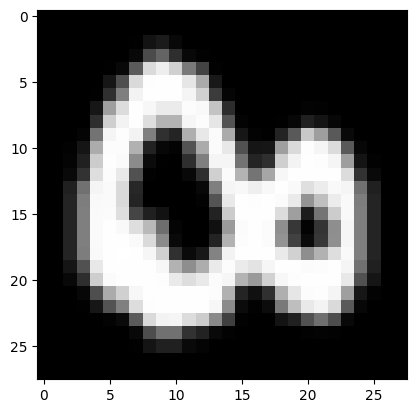

In [ ]:
print(dataset[0]['image'].shape)
plt.imshow(np.squeeze(dataset[0]['image']), cmap="gray")

In [ ]:
X = []
Y = []
for i in range(len(dataset)):
  X.append(tf.cast(dataset[i]['image'], tf.float32) / 255)
  Y.append(tf.one_hot(dataset[i]['label'], depth=10))

X = np.array(X)
Y = np.array(Y)

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
batch_size = 16
history = model.fit(
    x=Xtrain, y=Ytrain,
    validation_data=(Xtest, Ytest),
    epochs=5,
    steps_per_epoch = len(Xtrain)//batch_size,
    validation_steps=len(Xtest)//batch_size
)

Epoch 1/5
12000/12000 [==============================] - 60s 5ms/step - loss: 0.0701 - accuracy: 0.9796 - val_loss: 0.0494 - val_accuracy: 0.9857
Epoch 2/5
12000/12000 [==============================] - 53s 4ms/step - loss: 0.0316 - accuracy: 0.9907 - val_loss: 0.0288 - val_accuracy: 0.9919
Epoch 3/5
12000/12000 [==============================] - 57s 5ms/step - loss: 0.0242 - accuracy: 0.9929 - val_loss: 0.0344 - val_accuracy: 0.9904
Epoch 4/5
12000/12000 [==============================] - 54s 4ms/step - loss: 0.0202 - accuracy: 0.9940 - val_loss: 0.0265 - val_accuracy: 0.9930
Epoch 5/5
12000/12000 [==============================] - 58s 5ms/step - loss: 0.0176 - accuracy: 0.9950 - val_loss: 0.0287 - val_accuracy: 0.9926


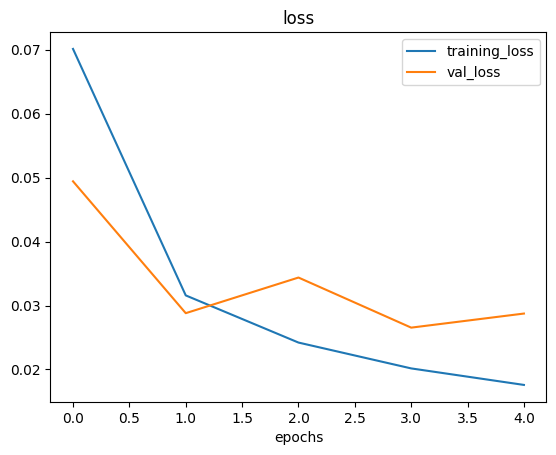

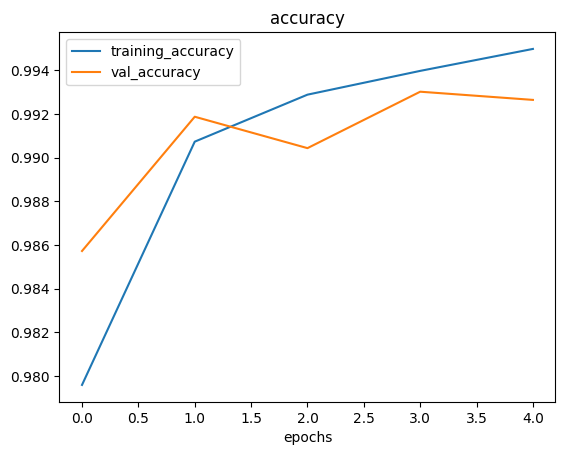

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # How many epochs


    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

plot_loss_curves(history)

# Tugas Lab 1-1

Gunakan data EMNIST/digit, lakukan perbandingan terhadap penggunaan seluruh data dengan menggunakan data yang lebih sedikit dari masing-masing class (1%, 10%, 50%). Jalankan kedua dataset dengan model LeNet dan AlexNet serta cobalah membuat modelmu sendiri (dapat dirubah dari base model sebelumnya).

Model : https://arxiv.org/ftp/arxiv/papers/1803/1803.01164.pdf

Buat laporan dari hasil pengujian yang telah dilakukan
1. Dasar teori mengenai dataset dan model
2. Analisa pembuatan model dari dataset
3. Hasil percobaan :
    - Grafik pergerakan training pada setiap epoch
    - Perbandingan penggunaan dataset dengan model dalam bentuk tabel
4. Kesimpulan

(Notes : Boleh ditambahkan hal lain yang dirasa penting)